<a href="https://colab.research.google.com/github/nicolycosta/Analise-de-Correlacao-e-Covariancia/blob/main/Covariance_and_Correlation_Matrix_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy

In [12]:
df = pd.read_excel("Base.xlsx")
df = df.set_index('Mês')
df.head(5)

,ICMS- Pará,IPCA - Núm índice
Mês,,
2004-01-01,2.080399e+08,2246.43
2004-02-01,1.887688e+08,2260.13
2004-03-01,1.593895e+08,2270.75
2004-04-01,1.749718e+08,2279.15
2004-05-01,1.973934e+08,2290.77


In [13]:
#Tornando a série em estacionária
df = df.diff().dropna()
df.head(5)

,ICMS- Pará,IPCA - Núm índice
Mês,,
2004-02-01,-19271095.42,13.70
2004-03-01,-29379308.75,10.62
2004-04-01,15582287.73,8.40
2004-05-01,22421587.15,11.62
2004-06-01,-5414707.06,16.26


# Covariância(X,Y) e Autocovariância

In [14]:
def Covariancia(x,y):
    
    from statistics import mean
    import pandas as pd
    import numpy as np
    import warnings    
    warnings.filterwarnings('ignore')
    
    #adjusting a base
    data = np.array([x.values, y.values])
    Cal= pd.DataFrame(data)
    Cal = Cal.T 
    Cal.columns=['X', 'Y']
    Cal['Covx']= 'NaN'
    Cal['Covy']= 'NaN'

    #mean x and y 
    meanx= mean(Cal['X'])
    meany= mean(Cal['Y'])

    position = 0
    for value in Cal['Covx']:
        Cal['Covx'][position] = (Cal['X'][position] - meanx) # (x-μx)
        position = position + 1
    position = 0
    for value in Cal['Covy']:
        Cal['Covy'][position] = Cal['Y'][position] - meany # (y-μy)
        position = position + 1

    
    Cal['Covx*Covy'] = Cal['Covx']*Cal['Covy'] #(x-μx)(y-μy)
    covxy = mean(Cal['Covx*Covy']) # E(x-μx)(y-μy)
    covx = mean(Cal['Covx']*Cal['Covx']) # E(x-μx)(x-μx)
    covy = mean(Cal['Covy']*Cal['Covy']) # E(y-μy)(y-μy)

    print()
    print('Covariância cruzada: ')
    print(f'                  {covxy}')
    print()
    print('Auto-Covariância do X: ')
    print(f'                  {covx}')
    print()
    print('Auto-Covariância do Y: ')
    print(f'                  {covy}')

In [15]:
Covariancia(df['ICMS- Pará'],df['IPCA - Núm índice '])


Covariância cruzada: 
                  -60215244.21757942

Auto-Covariância do X: 
                  4210569642576162.0

Auto-Covariância do Y: 
                  182.93852883862505


#### Matriz de Covariância (função pronta)

In [16]:
numpy.cov(df['ICMS- Pará'], df['IPCA - Núm índice '])

array([[ 4.23081277e+15, -6.05047406e+07],
       [-6.05047406e+07,  1.83818041e+02]])

# Correlação(X,Y)



In [19]:
def Correlacaocruzada (x,y,lags = 30):

    import matplotlib.pyplot as plt
    from statistics import mean
    import numpy as np
    
    listcorrelacao = []
    k = list(range(2,lags))
    
    for lag in k:
        data = np.array([x.values, y.values])
        Cal= pd.DataFrame(data)
        Cal = Cal.T 
        Cal.columns=['X', 'Y']
        Cal

        Cal= df
        Cal['Corx']= 'NaN'
        Cal['Cory']= 'NaN'
        Cal['Corylag0']= 'NaN'
        meanx= mean(x)
        meany= mean(y)

        #X
        i= 0
        for j in Cal['Corx']: #iterrow
            Cal['Corx'][i] = (x[i] - meanx) # (x-μx)
            i = i + 1


        #Y
        i= 0
        #k = 2 #lag
        lenn = round((len(y)+1)/lag) #for odd number
        while i <= lenn:
            Cal['Cory'][i] = y[i+lag] - meany # (y-μy)
            i = i + 1
    
        #Covariância cruzada (Yxy)   
        Cal['Corx*Cory'] = Cal['Corx'][0:lenn]*Cal['Cory'][0:lenn] #(x-μx)(y-μy)
        corxy = mean(Cal['Corx*Cory'].dropna()) # E(x-μx)(y-μy)
    
        #Auto Covariância (Yxx)
        corx = mean(Cal['Corx']*Cal['Corx']) # E(x-μx)(x-μx)
    
        #Auto Covariância (Yyy)
        i= 0
        for j in Cal['Corylag0']:
            Cal['Corylag0'][i] = y[i] - meany # (y-μy)
            i = i + 1
        cory = mean(Cal['Corylag0']*Cal['Corylag0']) # E(y-μy)(y-μy)

        listcorrelacao.append(corxy/((corx*cory)**(1/2)))
        
    plt.figure(figsize = (16, 9))
    ax= plt.subplot(1,1,1)
    ax.stem(listcorrelacao)
    plt.title('Correlação Cruzada', fontsize=16)

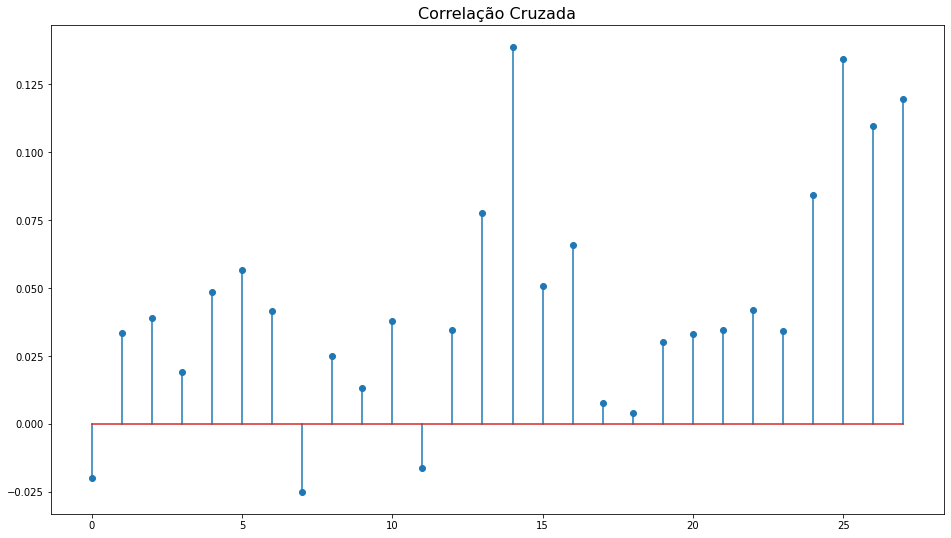

In [20]:
Correlacaocruzada(df['ICMS- Pará'],df['IPCA - Núm índice '], 30)